In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from scipy.linalg import cholesky, cho_solve, cho_factor
from scipy.spatial.distance import pdist, cdist, squareform

from mpl_toolkits.mplot3d import Axes3D
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import pairwise
from sklearn.preprocessing import PolynomialFeatures

**Programming Exercise 1**

In [2]:
N = 31

X_train = np.zeros((N * N, 2))
X_1, X_2 = np.meshgrid(np.linspace(-4, 4, N), np.linspace(-4, 4, N))
X_train[:, 0] = X_1.flatten()
X_train[:, 1] = X_2.flatten()
y_train = np.zeros(N * N)
y_train = y_train.reshape(-1, 1)

def f(x, y):
     return (np.sin(np.sqrt((0.5 * x) ** 2 + (0.5 * y) ** (4))))

y_train =  f(X_train[:, 0], X_train[:, 1])
y_train = y_train.reshape(-1, 1)

In [3]:
class KernelRidgeRegressor:
    
    def __init__(self, regularization=1, kernel_width=1):
        self.regularization = regularization
        self.kernel_width = kernel_width
    
    def _gaussian_kernel_distances(self, distances):
        return np.exp(-distances / self.kernel_width)
    
    def _gaussian_kernel(self, x, xp):
        return np.exp(-np.linalg.norm(x, xp) / self.kernel_width)
        
    def fit(self, X_train, y_train):
        if X_train is None:
            raise Exception('Training data input has not been provided')
            
        self.X_train = X_train
            
        if y_train is None:
            raise Exception('Training data output has not been provided')
            
        distances = sp.spatial.distance.pdist(X_train, 'sqeuclidean')
        
        A = sp.spatial.distance.squareform(self._gaussian_kernel_distances(distances)) + np.identity(self.X_train.shape[0])
        
        # Alternative 1 - NumPy Cholesky
        L = np.linalg.cholesky(A + self.regularization * np.identity(self.X_train.shape[0]))
        fs = np.linalg.solve(L, y_train)
        self.coef_ = np.linalg.solve(L.T.conj(), fs)
        
#         # Alternative 2 - SciPy Cholesky
#         A_factor = sp.linalg.cho_factor(A + self.regularization * np.identity(self.X_train.shape[0]))
#         self.coef_ = sp.linalg.cho_solve(A_factor, y_train)
        
#         # Alternative 3 - SciPy Cholesky with formula of Theorem 10.4
#         A_factor = sp.linalg.cho_factor(A.T @ A + self.regularization * np.identity(self.X_train.shape[0]))        
#         self.coef_ = sp.linalg.cho_solve(A_factor, A.T @ y_train)
        
#         # Alternative 4 - NumPy Solve
#         self.coef_ = np.linalg.solve(A + self.regularization * np.identity(self.X_train.shape[0]), y_train)
        
        return self
    
    def predict(self, X_eval):
        distances = sp.spatial.distance.cdist(X_eval, self.X_train, 'sqeuclidean')
        
        kernels = self._gaussian_kernel_distances(distances)
        
        return np.einsum('ij,kj->ki', [self.coef_], kernels)

In [4]:
krr = KernelRidgeRegressor(0.001, 1 / 0.15)
krr.fit(X_train, y_train)
print(krr.coef_)

[[ 2.14801102e+01]
 [ 2.62269745e+01]
 [ 2.59759118e+01]
 [ 2.31512608e+01]
 [ 1.97028419e+01]
 [ 1.69039754e+01]
 [ 1.53293897e+01]
 [ 1.49830032e+01]
 [ 1.55133061e+01]
 [ 1.64439322e+01]
 [ 1.73587771e+01]
 [ 1.80072900e+01]
 [ 1.83254118e+01]
 [ 1.83912206e+01]
 [ 1.83464009e+01]
 [ 1.83152969e+01]
 [ 1.83464009e+01]
 [ 1.83912206e+01]
 [ 1.83254118e+01]
 [ 1.80072900e+01]
 [ 1.73587771e+01]
 [ 1.64439322e+01]
 [ 1.55133061e+01]
 [ 1.49830032e+01]
 [ 1.53293897e+01]
 [ 1.69039754e+01]
 [ 1.97028419e+01]
 [ 2.31512608e+01]
 [ 2.59759118e+01]
 [ 2.62269745e+01]
 [ 2.14801102e+01]
 [-3.51084518e+01]
 [-2.71997399e+01]
 [-2.49840409e+01]
 [-2.57763999e+01]
 [-2.74810180e+01]
 [-2.87841926e+01]
 [-2.91416528e+01]
 [-2.86039899e+01]
 [-2.75582710e+01]
 [-2.64706143e+01]
 [-2.56954160e+01]
 [-2.53826739e+01]
 [-2.54795764e+01]
 [-2.57978444e+01]
 [-2.61091667e+01]
 [-2.62351732e+01]
 [-2.61091667e+01]
 [-2.57978444e+01]
 [-2.54795764e+01]
 [-2.53826739e+01]
 [-2.56954160e+01]
 [-2.6470614

Comparing with results from Example 10.6

In [5]:
phi_X_train = pairwise.rbf_kernel(X_train, X_train, gamma=0.15)
print('# of inputs/features: ', phi_X_train.shape[1])

lin = Ridge(0.001)
lin.fit(phi_X_train, y_train)
print(lin.solver)
print(lin.coef_)

# of inputs/features:  961
auto
[[-1.60347492 -0.93791317 -0.48561824 -0.24354302 -0.1809199  -0.248382
  -0.38942584 -0.55149607 -0.69436184 -0.79442291 -0.84478665 -0.85200391
  -0.83094575 -0.79934556 -0.77313528 -0.76312981 -0.77313528 -0.79934556
  -0.83094575 -0.85200391 -0.84478665 -0.79442291 -0.69436184 -0.55149607
  -0.38942584 -0.248382   -0.1809199  -0.24354302 -0.48561824 -0.93791317
  -1.60347492 -1.42523197 -0.73173336 -0.27363945 -0.04133462  0.00426643
  -0.07924177 -0.2288793  -0.38845459 -0.51724359 -0.59383505 -0.615221
  -0.59237969 -0.54418361 -0.49138001 -0.45180576 -0.43724954 -0.45180576
  -0.49138001 -0.54418361 -0.59237969 -0.615221   -0.59383505 -0.51724359
  -0.38845459 -0.2288793  -0.07924177  0.00426643 -0.04133462 -0.27363945
  -0.73173336 -1.42523197 -1.08249976 -0.37118597  0.08404338  0.30109216
   0.32847905  0.23233479  0.0815856  -0.06515638 -0.16827262 -0.21014897
  -0.19293395 -0.13274356 -0.05255272  0.02425321  0.07852421  0.098009
   0.0785242

In [6]:
kr = KernelRidge(alpha=0.001, gamma=0.15)
kr.fit(X_train, y_train)

KernelRidge(alpha=0.001, gamma=0.15)

In [7]:
N_eval = 150
x_1 = np.linspace(-4.2,4.2,N_eval)
x_2 = np.linspace(-4.2,4.2,N_eval)
X_1, X_2 = np.meshgrid(x_1,x_2)
X_eval = np.zeros((N_eval**2,2))
X_eval[:,0] = X_1.flatten()
X_eval[:,1] = X_2.flatten()
phi_X_eval = pairwise.rbf_kernel(X_eval, X_train,gamma=0.15)

Y_eval = lin.predict(phi_X_eval)

/tmp/ipykernel_156265/1574861976.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


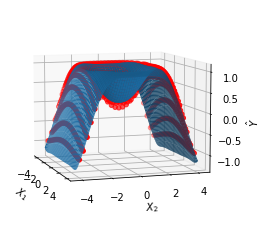

In [8]:
pos = np.empty(X_1.shape + (2,))
pos[:, :, 0] = X_1; pos[:, :, 1] = X_2
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1],y_train[:],c='red', label="training set")
ax.plot_surface(X_1,X_2,Y_eval.reshape(N_eval,N_eval), label="regression predictor")
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel("$\hat{Y}$")
ax.view_init(elev=8., azim=-18)
plt.show()